In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

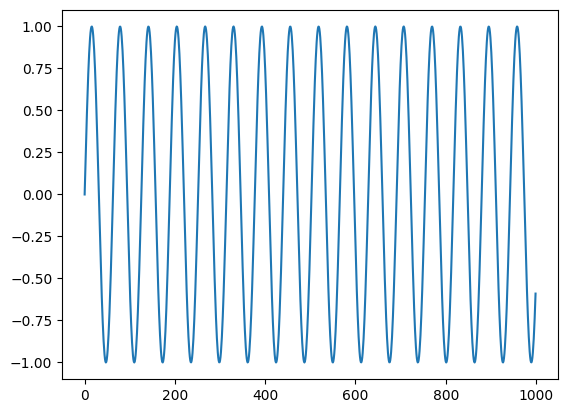

In [5]:
# RNN = Recurent Neural Network
# 시계열 데이터 : time series data
# 시간과의 연관성, auto-correlation 자기 상관성, 트렌드(추세), 계절성


# RNN = Recurent Neural Network
# 시계열 데이터 : time series data
# 시간과의 연관성, auto-correlation 자기 상관성, 트렌드(추세), 계절성


# np.arange(1000) → 정수 0부터 999까지의 정수 배열을 생성함 (총 1000개 요소)
#                  [0, 1, 2, 3, ..., 999] 형태의 1차원 배열
# 0.1 * np.arange(1000) → 배열의 각 요소에 0.1을 곱함
#                         [0.0, 0.1, 0.2, ..., 99.9] → 시간축(time step) 역할을 하는 등간격 시점
# np.sin(...) → 위에서 만든 시점 값들에 대해 사인(sine) 함수를 적용하여 주기적 값 생성
#               → 결과적으로 주기적으로 변하는 사인파 형태의 시계열 데이터를 생성함
#               → 이 데이터는 RNN, LSTM 등 시계열 모델의 입력으로 사용하기 적합함
series = np.sin(0.1 * np.arange(1000))  # 사인 함수 기반의 1000개 시점 시계열 데이터 생성

plt.plot(series)
plt.show()

In [6]:
T = 10  # 입력 시퀀스 길이 (과거 10개 값을 보고 미래를 예측)
D = 1   # 입력 데이터의 차원 수 (사인파는 1차원이므로 1)

X = []  # 입력 시퀀스를 저장할 리스트 (2차원 형태로 구성됨)
Y = []  # 예측 대상 값(다음 시점의 값)을 저장할 리스트


for t in range(len(series) - T):  # 마지막 시점까지 전체 시계열 데이터를 순회
    x = series[t:t+T]  # 시점 t부터 t+T까지의 10개 연속 값을 하나의 시퀀스로 추출
    X.append(x)        # 입력 시퀀스 리스트에 추가
    y = series[t+T]    # 그 다음 시점의 값을 예측 대상으로 설정
    Y.append(y)        # 정답 타깃 리스트에 추가


# 리스트 형태로 저장된 입력 시퀀스 X를 넘파이 배열로 변환하고,
# LSTM 모델 학습에 맞는 3차원 형태 (샘플 수, 시퀀스 길이, 피처 수)로 reshape함
# -1: 샘플 수를 자동 계산 / T: 시퀀스 길이(여기선 990) / 1: 피처 수 (단일 시계열)
X = np.array(X).reshape(-1, T, 1)

# 정답값 Y도 넘파이 배열로 변환함 (1차원 벡터, shape = (샘플 수,))
Y = np.array(Y)

# 전체 샘플 수를 계산하여 변수 N에 저장
N = len(X)

# X와 Y의 최종 형태를 출력하여 확인함
# X: (샘플 수, 시퀀스 길이, 피처 수), Y: (샘플 수,)
print('X.shape', X.shape, 'Y.shape', Y.shape)


X.shape (990, 10, 1) Y.shape (990,)


In [7]:
# RNN 모델을 구성하기 위한 입력 정의
# 입력 shape은 (시퀀스 길이 T, 피처 수 1) — 예: (10, 1)
i = Input(shape=(T, 1))

# SimpleRNN 층을 추가함
# 유닛 수는 15개이며, 활성화 함수는 ReLU를 사용함
# 이 층은 입력 시퀀스를 순차적으로 처리하고 마지막 hidden state를 출력함
x = SimpleRNN(15, activation='relu')(i)

# 출력층 (Dense) 구성: 예측값 1개를 출력하는 회귀용 단일 뉴런
x = Dense(1)(x)

# 모델 정의: 입력 i로부터 출력 x까지 연결한 모델을 생성
model = Model(i, x)

# 모델 컴파일: 손실 함수로 평균제곱오차(MSE) 사용, 옵티마이저는 Adam
model.compile(
    loss='mse',  # MSE = (실제값 - 예측값)의 제곱을 모두 더한 후, 전체 데이터 개수로 나눈 값
    optimizer=Adam(learning_rate=0.001)  # 학습률 0.001
)

# 모델 학습
# 전체 데이터 X와 Y를 절반으로 나누어, 앞 절반은 학습용, 뒤 절반은 검증용으로 사용함
# N은 전체 샘플 수
r = model.fit(
    X[:-N//2],       # 학습용 입력 데이터 (앞 절반)
    Y[:-N//2],       # 학습용 정답 데이터
    epochs=80,       # 학습 에폭 수
    validation_data=(X[-N//2:], Y[-N//2:])  # 검증용 데이터 (뒤 절반)
)


Epoch 1/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.1181 - val_loss: 0.0622
Epoch 2/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0488 - val_loss: 0.0347
Epoch 3/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0281 - val_loss: 0.0148
Epoch 4/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - val_loss: 0.0081
Epoch 5/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - val_loss: 0.0059
Epoch 6/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - val_loss: 0.0041
Epoch 7/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 8/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 9/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011 - val_loss: 8.5331e-04
Epoch 10/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9627e-04 - val_loss: 6.0810e-04
Epoch 11/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8345e-04 - val_loss: 4.9891e-04
Epoch 12/80
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

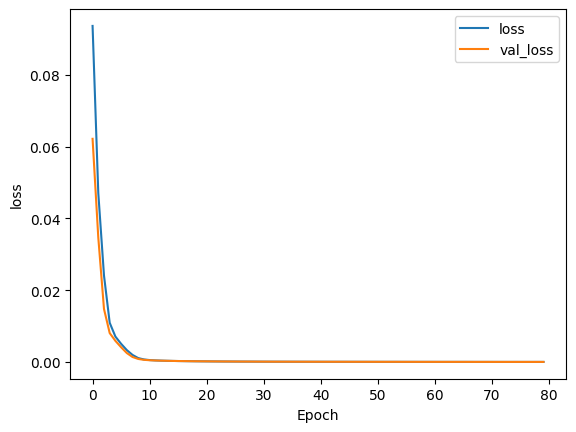

In [9]:
#loss 그래프를 그리세요

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('loss')

plt.legend()
plt.show()

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


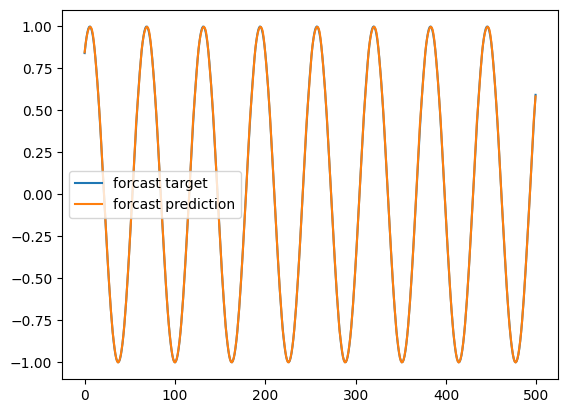

In [12]:
# 모델을 사용해 입력 데이터 X에 대한 예측값 생성
Y_pred = model.predict(X)

# 실제값 중 처음 500개
plt.plot(Y[:500], label='forcast target')

# 예측값 중 처음 500개
plt.plot(Y_pred[:500], label='forcast prediction')

plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

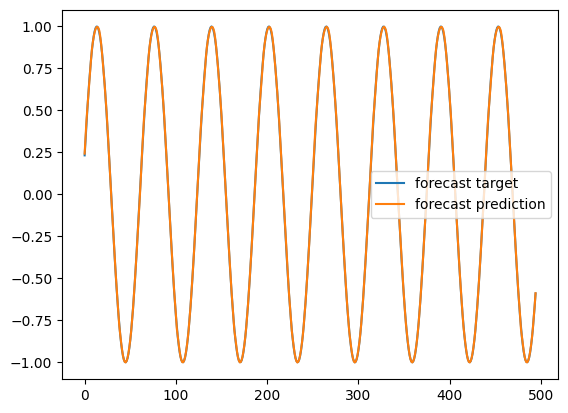

In [19]:
# 교수님 답! 뒤 500이라는걸 못들어쒀....

validation_target = Y[-N//2:]  # N=990, 495부터
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  p= model.predict(X[i].reshape(1, -1, 1))[0,0]
  i+= 1

  validation_predictions.append(p)


plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

